In [5]:
!pip install matplotlib
!pip install python-igraph

In [1]:
import igraph as ig
import numpy as np

N = 1000
G = ig.Graph.Erdos_Renyi(N, 3/N)

W = np.array(G.get_adjacency().data, dtype=np.float64)
vals = np.linalg.eigvalsh(W).real

In [2]:
import emate
emate.__version__

/home/devmessias/venvs/emate/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/devmessias/venvs/emate/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/devmessias/venvs/emate/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/devmessias/venvs/emate/lib/python3.7/site-packages/tensorf

/home/devmessias/venvs/emate/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/devmessias/venvs/emate/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/devmessias/venvs/emate/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/devmessias/venvs/emate/lib/python3.7/

'1.0.4'

In [3]:
import numpy as np
from scipy.sparse import coo_matrix


def ig2sparse(G, transpose=False, attr=None, precision=32):
    """Given an igraph instance returns the sparse adjacency matrix
    in COO format.
    Parameters
    ----------
        G: igraph instance
        transpose : bool 
            If the adjacency matrix should be transposed or not
        attr : str 
            The name of weight attribute
        precision : int
             The precision used to store the weight attributes
    Returns
    --------
        L : COO Sparse matrix
    """

    if attr:
        source, target, data = zip(*[
            (e.source, e.target, e[attr])
            for e in G.es if not np.isnan(e[attr])
        ])
    else:
        source, target = zip(*[
            (e.source, e.target)
            for e in G.es
        ])
        data = np.ones(len(source)).astype('int').tolist()

    if not G.is_directed():
        source, target = source + target, target + source
        data = data + data

    if precision == 64:
        np_type = np.float64
    elif precision == 32:
        np_type = np.float32

    data = np.array(data, dtype=np_type)
    if transpose:
        L = coo_matrix(
            (data, (target, source)),
            shape=[G.vcount(), G.vcount()]
        )
    else:
        L = coo_matrix(
            (data, (source, target)),
            shape=[G.vcount(), G.vcount()]
        )

    return L


In [4]:
from emate.hermitian import pykpm

W = ig2sparse(G)

num_moments = 300
num_vecs = 200
extra_points = 10
ek, rho = pykpm(W, num_moments, num_vecs, extra_points, device="/cpu:0")

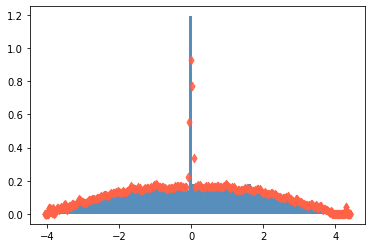

In [5]:
import matplotlib.pyplot as plt
plt.hist(vals, density=True, bins=100, alpha=.9, color="steelblue")
plt.scatter(ek, rho, c="tomato", zorder=999, alpha=0.9, marker="d")